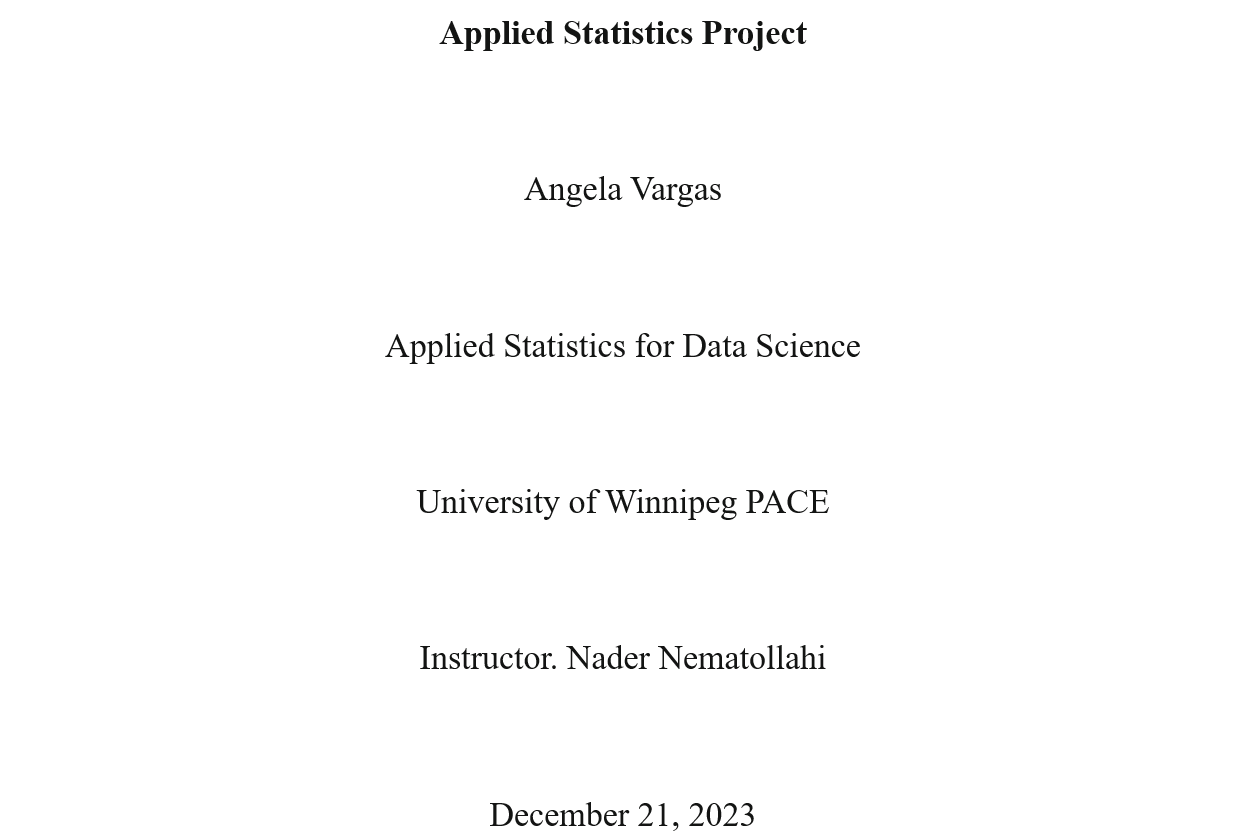

# 

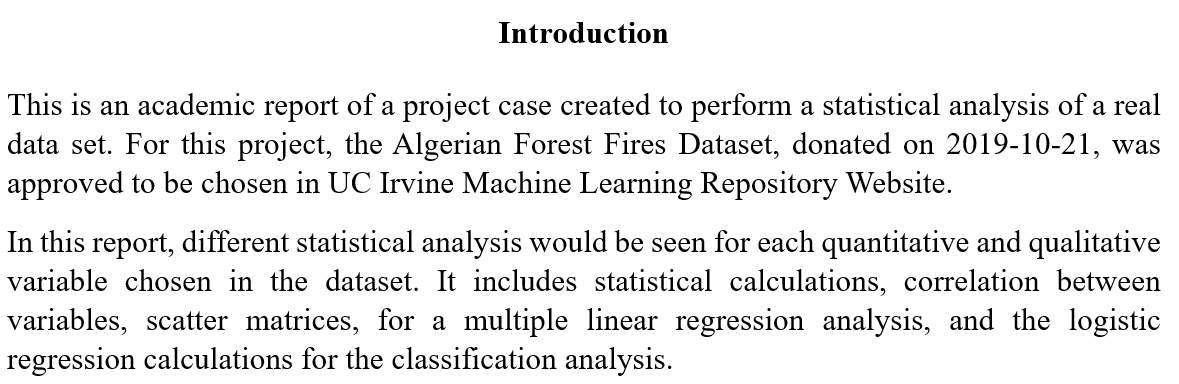

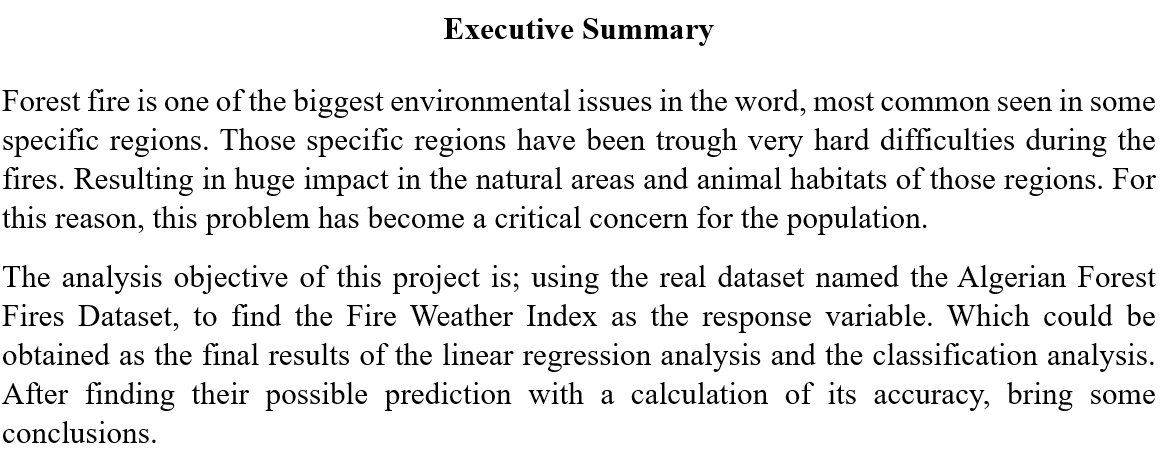

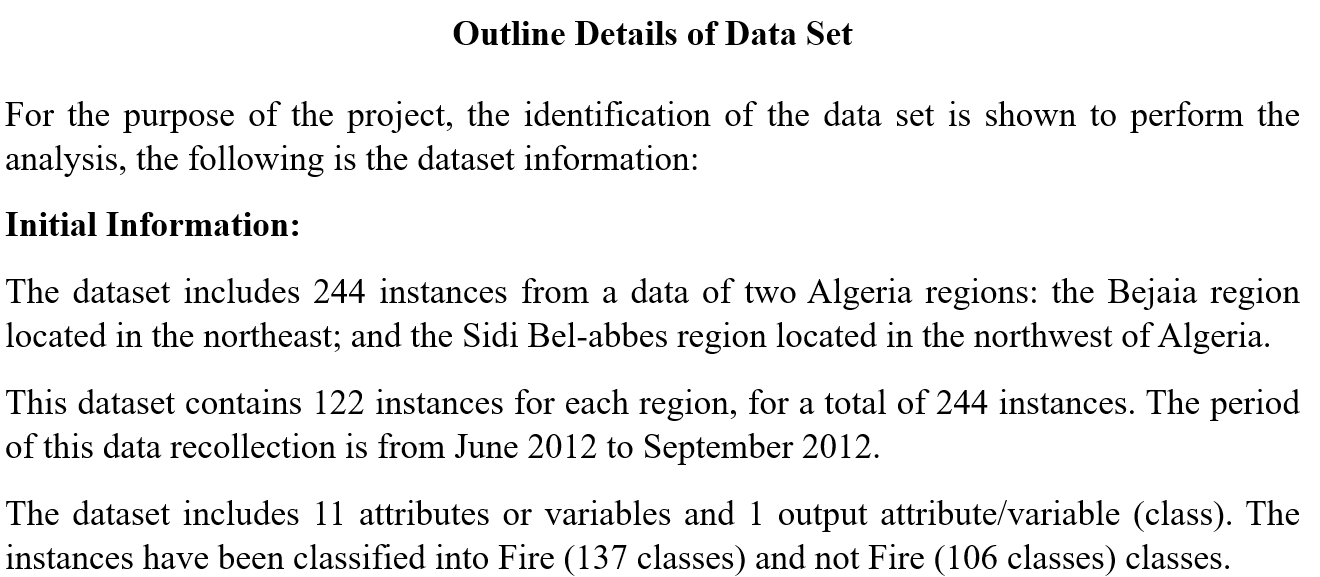

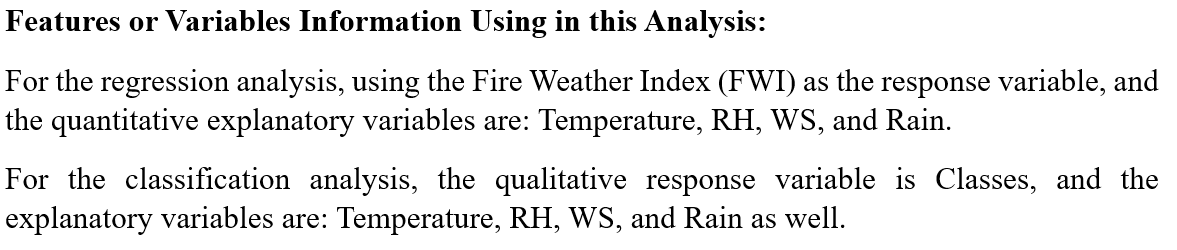

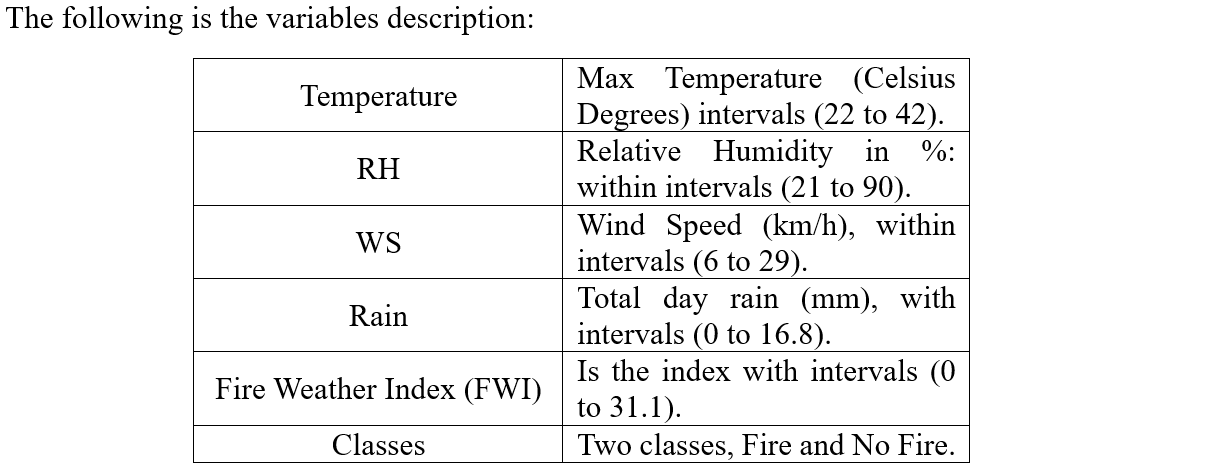

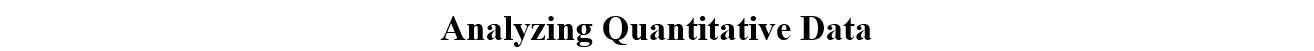

#### Using one quantitive response variable: FWI, and Four quantitative explanatory variables: Temperature, RH, WS, and Rain.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### DataFrame From Data and Print: Selecting only the Variables Chosen for the Project.

In [2]:
fire = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', 
                   usecols = ['Temperature', 'RH','Ws','Rain','FWI','Classes'], 
                   low_memory = True)
fire

Temperature  RH  Ws  Rain  FWI       Classes
0             29  57  18   0.0  0.5   not fire   
1             29  61  13   1.3  0.4   not fire   
2             26  82  22  13.1  0.1   not fire   
3             25  89  13   2.5    0   not fire   
4             27  77  16   0.0  0.5   not fire   
..           ...  ..  ..   ...  ...           ...
239           30  65  14   0.0  6.5       fire   
240           28  87  15   4.4    0   not fire   
241           27  87  29   0.5  0.2   not fire   
242           24  54  18   0.1  0.7   not fire   
243           24  64  15   0.2  0.5  not fire    

[244 rows x 6 columns]

In [3]:
# Now, it is needed to check the NaN or missing values columns
fire.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FWI            0
Classes        1
dtype: int64

In [4]:
fire.dropna(subset=['Classes'], inplace=True)
print(fire)

     Temperature  RH  Ws  Rain  FWI       Classes
0             29  57  18   0.0  0.5   not fire   
1             29  61  13   1.3  0.4   not fire   
2             26  82  22  13.1  0.1   not fire   
3             25  89  13   2.5    0   not fire   
4             27  77  16   0.0  0.5   not fire   
..           ...  ..  ..   ...  ...           ...
239           30  65  14   0.0  6.5       fire   
240           28  87  15   4.4    0   not fire   
241           27  87  29   0.5  0.2   not fire   
242           24  54  18   0.1  0.7   not fire   
243           24  64  15   0.2  0.5  not fire    

[243 rows x 6 columns]


In [5]:
# Now, it is needed to check the NaN or missing values columns again
fire.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FWI            0
Classes        0
dtype: int64

In [6]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FWI          243 non-null    object 
 5   Classes      243 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 13.3+ KB


In [7]:
#Convert Dtype to numeric values depending of the columns values:

# The astype() function can take a dictionary of column names and data types:
# Manually writing the type of each column, Creating the DataFrame:

col_type = {
    'FWI': 'float'
}
# Creating a single dictionary with values to replace:
clean_dict = {'%': '', '−': '-', '\(est\)': ''}

#Replacing the data to the new fire dataframe with new dtypes:

fire = fire.replace(clean_dict, regex=True).replace({'-n/a ': np.nan}).astype(col_type)

In [8]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FWI          243 non-null    float64
 5   Classes      243 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 13.3+ KB


In [9]:
#Cleaning data with normalize:

#Other way to clean data is normalize to clean the %
    #The following will clean all the text values

from unicodedata import normalize

def clean_normalize_whitespace(x):
    if isinstance(x, str):
        return normalize('NFKC', x).strip()
    else:
        return x

#To run this function on the entire DataFrame using map

fire = fire.map(clean_normalize_whitespace)

##### Comments: it was removed only one row that belongs to a missing value for classes since I am not able to update or get the correct information to fill that missing space. It will help to calculate statistic measures to all values with a better accuracy. Also, I converted the data of FWI column into float as they were read as string but in reality those are numeric decimals data type. At the end, I cleaned all data spaces that are causing differences between the same value due spaces in string data.

### Frequency Tables, Histograms, Summary Measures, BoxPlot for the Quantitive Variables.

#### Temperature Variable  (Explanatory Variable).

In [10]:
# Frequency Table:
tmin = fire['Temperature'].min()
tmax = fire['Temperature'].max()

# Converting the DataFrame into Series or one dimensional
Series = fire.Temperature.squeeze()

#Defining bins for Temperature_data categories depending on max, min, adding 3 as length
Tbins = range(tmin,tmax,3)

# #adding a new column to the DataFrame representing temperature categories
Tcateg = pd.cut(Series, Tbins, include_lowest = True, right=False)

# #Create the frequency table for temperature
Tfrequency_table= pd.Series(Tcateg).value_counts().sort_index()

# #Calculation of relative frequency
Trelative_frequency = Tfrequency_table/ len(Tcateg)

# #combining frequency and relative frequency in a new DataFrame
Tfrq_distribution = pd.DataFrame({'Frequency': Tfrequency_table, "Relative Frequency": Trelative_frequency})
print("\nFrequency Table:")
print(Tfrq_distribution)


Frequency Table:
             Frequency  Relative Frequency
Temperature                               
[22, 25)             5            0.020576
[25, 28)            19            0.078189
[28, 31)            55            0.226337
[31, 34)            69            0.283951
[34, 37)            74            0.304527
[37, 40)            17            0.069959


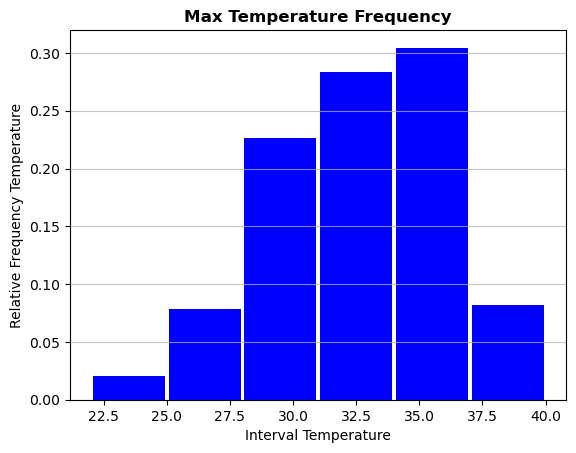

In [11]:
#Create the histogram with Series as Temperature Data
Series.plot.hist(bins=Tbins, rwidth=0.95, color = 'blue', weights = np.ones_like(Series)/len(Series))

#Adding the appropiate labels and title to the histogram
plt.title('Max Temperature Frequency', fontweight ='bold')
plt.xlabel("Interval Temperature")
plt.ylabel('Relative Frequency Temperature')
plt.grid(axis = "y", alpha=0.75)
plt.show()

##### comments: The histogram above shows there are more frequency data between 28 and 36.

In [12]:
# Calculation for the 5 statistics calculations of Temperature: 
Tmean=statistics.mean(fire['Temperature'])
Tmedian=statistics.median(fire['Temperature'])
Tmode=statistics.multimode(fire['Temperature'])
Tstdev=statistics.stdev(fire['Temperature'])
print('Temperature Summary Measures:\n','Mean:',round(Tmean,2),
      '\n Median:',Tmedian,'\n Mode:',Tmode,'\n Standard Deviation:',round(Tstdev,2))

Temperature Summary Measures:
 Mean: 32.15 
 Median: 32 
 Mode: [35] 
 Standard Deviation: 3.63


In [13]:
# Calling the three quartiles with the temperature_data
Tquantiles = np.quantile(fire.Temperature,[0.25,0.5,0.75], method = 'midpoint')

#Calculating the Interquartile Range (IQR) of time using Temperature_data
T_IQR = np.quantile(fire.Temperature,0.75, method='midpoint')-np.quantile(fire.Temperature,0.25,
                                                                          method = 'midpoint')

#Showing the results of above calculations
print('The three Quantiles of Temperature are:', Tquantiles, "\nthe IQR is:",T_IQR,
      '\nMin Value Temperature:',tmin,', Max Value Temperature',tmax)

The three Quantiles of Temperature are: [30. 32. 35.] 
the IQR is: 5.0 
Min Value Temperature: 22 , Max Value Temperature 42


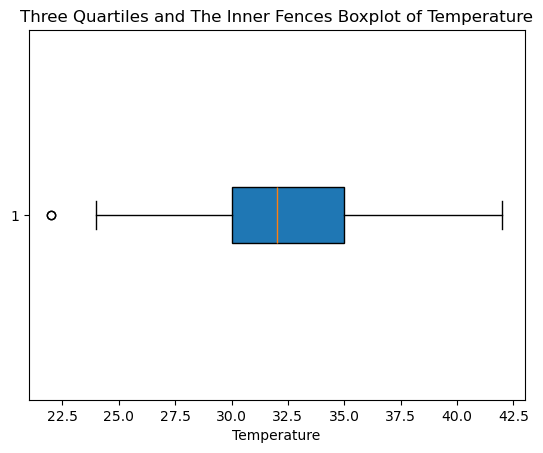

In [14]:
# Creating the plot using Temperature data
plt.boxplot(fire.Temperature, vert=False, patch_artist=True)
plt.title('Three Quartiles and The Inner Fences Boxplot of Temperature')
plt.xlabel('Temperature')

#Showing the Boxplot:
plt.show()

In [15]:
def find_outliers_IQR(fire):

   q1=fire.quantile(0.25)

   q3=fire.quantile(0.75)

   IQR=q3-q1

   outliers = fire[((fire<(q1-1.5*IQR)) | (fire>(q3+1.5*IQR)))]

   return outliers


outliers = find_outliers_IQR(fire["Temperature"])

print("number of outliers:"+ str(len(outliers)))

number of outliers:2


##### Comments Outliers and Skewness: the above Boxplot shows there are only two outliers in this Temperature data after the min fence value, which it's not necessary to remove because the difference is not too higher from the fence value. the median is tending to be a bit to the left of the center of the box and the longer fence is the maximum value within the two inner fences. The data distribution is skewed to the right because the upper 50% of the values are spread over a bigger range of Q3 than the left side Q1.

#### RH Variable (Relative Humidity)  (Explanatory Variable).

In [16]:
# Frequency Table:
Rmin = fire['RH'].min()
Rmax = fire['RH'].max()

# Converting the DataFrame into Series or one dimensional
Series = fire.RH.squeeze()

#Defining bins for RH_data categories depending on max, min, adding 5 as length
Rbins = range(Rmin,Rmax,5)

# #adding a new column to the DataFrame representing RH categories
Rcateg = pd.cut(Series, Rbins, include_lowest = True, right=False)

# #Create the frequency table for RH
Rfrequency_table= pd.Series(Rcateg).value_counts().sort_index()

# #Calculation of relative frequency
Rrelative_frequency = Rfrequency_table/ len(Rcateg)

# #combining frequency and relative frequency in a new DataFrame
Rfrq_distribution = pd.DataFrame({'Frequency': Rfrequency_table, "Relative Frequency": Rrelative_frequency})
print("\nFrequency Table:")
print(Rfrq_distribution)


Frequency Table:
          Frequency  Relative Frequency
RH                                     
[21, 26)          2            0.008230
[26, 31)          2            0.008230
[31, 36)          7            0.028807
[36, 41)          8            0.032922
[41, 46)         18            0.074074
[46, 51)         16            0.065844
[51, 56)         31            0.127572
[56, 61)         26            0.106996
[61, 66)         31            0.127572
[66, 71)         27            0.111111
[71, 76)         21            0.086420
[76, 81)         28            0.115226
[81, 86)         12            0.049383


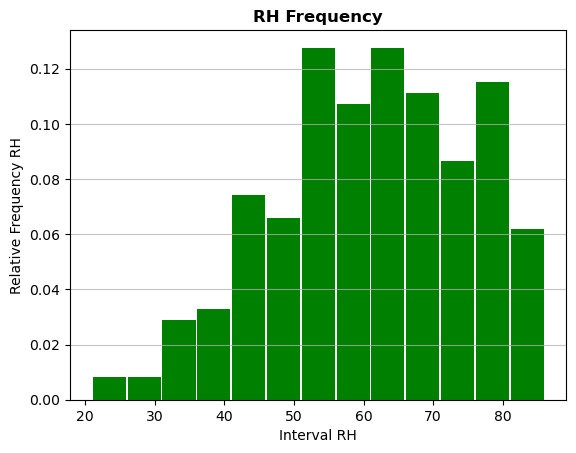

In [17]:
#Create the histogram with Series as RH Data
Series.plot.hist(bins=Rbins, rwidth=0.95, color = 'green', weights = np.ones_like(Series)/len(Series))

#Adding the appropiate labels and title to the histogram
plt.title('RH Frequency', fontweight ='bold')
plt.xlabel("Interval RH")
plt.ylabel('Relative Frequency RH')
plt.grid(axis = "y", alpha=0.75)
plt.show()

##### comments: The histogram above shows there are more frequency data distributed between 51 and 80.

In [18]:
# Calculation for the 5 statistics calculations of RH: 
Rmean=statistics.mean(fire['RH'])
Rmedian=statistics.median(fire['RH'])
Rmode=statistics.multimode(fire['RH'])
Rstdev=statistics.stdev(fire['RH'])
print('RH Summary Measures:\n','Mean:',round(Rmean,2),
      '\n Median:',Rmedian,'\n Mode:',Rmode,'\n Standard Deviation:',round(Rstdev,2))

RH Summary Measures:
 Mean: 62.04 
 Median: 63 
 Mode: [55, 64] 
 Standard Deviation: 14.83


In [19]:
# Calling the three quartiles with the RH_data
Rquantiles = np.quantile(fire.RH,[0.25,0.5,0.75], method = 'midpoint')

#Calculating the Interquartile Range (IQR) of time using RH_data
R_IQR = np.quantile(fire.RH,0.75, method='midpoint')-np.quantile(fire.RH,0.25,
                                                                          method = 'midpoint')

#Showing the results of above calculations
print('The three Quantiles of RH are:', Rquantiles, "\nthe IQR is:",R_IQR,
      '\nMin Value RH:',Rmin,', Max Value RH',Rmax)

The three Quantiles of RH are: [52.5 63.  73.5] 
the IQR is: 21.0 
Min Value RH: 21 , Max Value RH 90


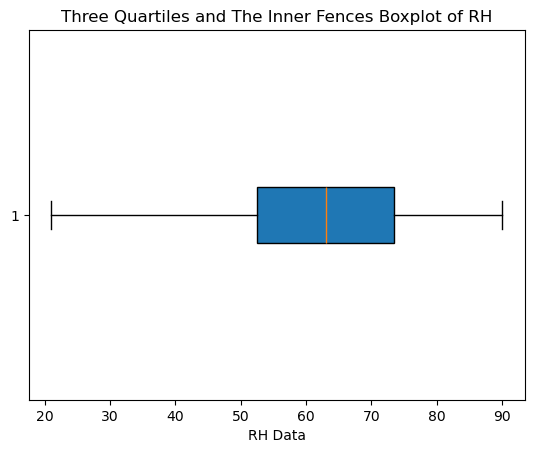

In [20]:
# Creating the plot using RH data
plt.boxplot(fire.RH, vert=False, patch_artist=True)
plt.title('Three Quartiles and The Inner Fences Boxplot of RH')
plt.xlabel('RH Data')

#Showing the Boxplot:
plt.show()

In [21]:
def find_outliers_IQR(fire):

   q1=fire.quantile(0.25)

   q3=fire.quantile(0.75)

   IQR=q3-q1

   outliers = fire[((fire<(q1-1.5*IQR)) | (fire>(q3+1.5*IQR)))]

   return outliers


outliers = find_outliers_IQR(fire["RH"])

print("number of outliers:"+ str(len(outliers)))

number of outliers:0


##### Comments Outliers and Skewness: the above Boxplot shows there isn't  any outlier in this HR data after the fences values, the median is tending to be in the center of the box and the longer fence is the maximum value within the two inner fences, the same with the lower fence coincide with the min value. The data distribution is skewed to be symetric but with the lowest inner fence it is tending to the left.

#### Ws Variable (Wind Speed) (Explanatory Variable).

In [22]:
# Frequency Table:
Wmin = fire['Ws'].min()
Wmax = fire['Ws'].max()

# Converting the DataFrame into Series or one dimensional
Series = fire.Ws.squeeze()

#Defining bins for Ws_data categories depending on max, min, adding 5 as length
Wbins = range(Wmin,Wmax,5)

# #adding a new column to the DataFrame representing Ws categories
Wcateg = pd.cut(Series, Wbins, include_lowest = True, right=False)

# #Create the frequency table for Ws
Wfrequency_table= pd.Series(Wcateg).value_counts().sort_index()

# #Calculation of relative frequency
Wrelative_frequency = Wfrequency_table/ len(Wcateg)

# #combining frequency and relative frequency in a new DataFrame
Wfrq_distribution = pd.DataFrame({'Frequency': Wfrequency_table, "Relative Frequency": Wrelative_frequency})
print("\nFrequency Table:")
print(Wfrq_distribution)


Frequency Table:
          Frequency  Relative Frequency
Ws                                     
[6, 11)           7            0.028807
[11, 16)        127            0.522634
[16, 21)         97            0.399177
[21, 26)         10            0.041152


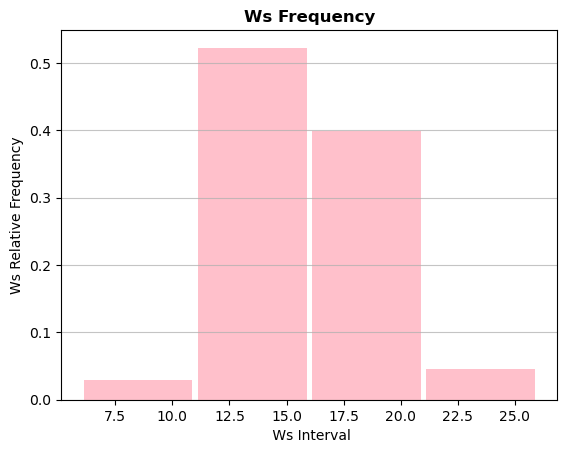

In [23]:
#Create the histogram with Series as Ws Data
Series.plot.hist(bins=Wbins, rwidth=0.95, color = 'pink', weights = np.ones_like(Series)/len(Series))

#Adding the appropiate labels and title to the histogram
plt.title('Ws Frequency', fontweight ='bold')
plt.xlabel(" Ws Interval")
plt.ylabel('Ws Relative Frequency')
plt.grid(axis = "y", alpha=0.75)
plt.show()

##### comments: The histogram above shows there are more frequency data between 12 and 20.

In [24]:
# Calculation for the 5 statistics calculations of Ws: 
Wmean=statistics.mean(fire['Ws'])
Wmedian=statistics.median(fire['Ws'])
Wmode=statistics.multimode(fire['Ws'])
Wstdev=statistics.stdev(fire['Ws'])
print('Ws Summary Measures:\n','Mean:',round(Wmean,2),
      '\n Median:',Wmedian,'\n Mode:',Wmode,'\n Standard Deviation:',round(Wstdev,2))

Ws Summary Measures:
 Mean: 15.49 
 Median: 15 
 Mode: [14] 
 Standard Deviation: 2.81


In [25]:
# Calling the three quartiles with the Ws_data
Wquantiles = np.quantile(fire.Ws,[0.25,0.5,0.75], method = 'midpoint')

#Calculating the Interquartile Range (IQR) of time using Ws_data
W_IQR = np.quantile(fire.Ws,0.75, method='midpoint')-np.quantile(fire.Ws,0.25,
                                                                          method = 'midpoint')

#Showing the results of above calculations
print('The three Quantiles of Ws are:', Wquantiles, "\nthe IQR is:",W_IQR,
      '\nMin Value Ws:',Wmin,', Max Value Ws:',Wmax)

The three Quantiles of Ws are: [14. 15. 17.] 
the IQR is: 3.0 
Min Value Ws: 6 , Max Value Ws: 29


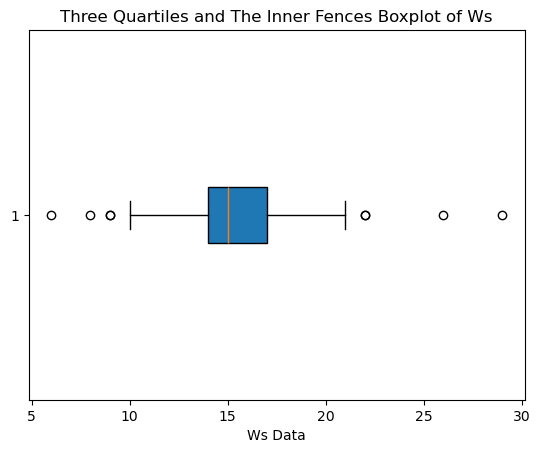

In [26]:
# Creating the plot using Ws data
plt.boxplot(fire.Ws, vert=False, patch_artist=True)
plt.title('Three Quartiles and The Inner Fences Boxplot of Ws')
plt.xlabel('Ws Data')

#Showing the Boxplot:
plt.show()

In [27]:
def find_outliers_IQR(fire):

   q1=fire.quantile(0.25)

   q3=fire.quantile(0.75)

   IQR=q3-q1

   outliers = fire[((fire<(q1-1.5*IQR)) | (fire>(q3+1.5*IQR)))]

   return outliers


outliers = find_outliers_IQR(fire["Ws"])

print("number of outliers:"+ str(len(outliers)))

print("max outlier value:"+ str(outliers.max()))

print("min outlier value:"+ str(outliers.min()))

number of outliers:8
max outlier value:29
min outlier value:6


##### Comments Outliers and Skewness: the above Boxplot shows there are three outliers after the upper fence, and three outliers before the lower fence in this Ws data, the median is tending to the left of the box. The data distribution is skewed to the right, which means that there are more data whitin the last Q3 quartile.
##### these outliers wouldn't be removed as we can get some good insights as the Wind speed could have some high variations and these points could be normal.

#### Rain Variable (mm) (Explanatory Variable).

In [28]:
# Frequency Table:
Nmin = fire['Rain'].min()
Nmax = fire['Rain'].max()

# Converting the DataFrame into Series or one dimensional
Series = fire.Rain.squeeze()

#Defining bins for Rain_data categories depending on max, min, adding 3 as length
Nbins = range(int(Nmin),int(Nmax),3)

# #adding a new column to the DataFrame representing Rain categories
Ncateg = pd.cut(Series, Nbins, include_lowest = True, right=False)

# #Create the frequency table for Rain
Nfrequency_table= pd.Series(Ncateg).value_counts().sort_index()

# #Calculation of relative frequency
Nrelative_frequency = Nfrequency_table/ len(Ncateg)

# #combining frequency and relative frequency in a new DataFrame
Nfrq_distribution = pd.DataFrame({'Frequency': Nfrequency_table, "Relative Frequency": Nrelative_frequency})
print("\nFrequency Table:")
print(Nfrq_distribution)


Frequency Table:
          Frequency  Relative Frequency
Rain                                   
[0, 3)          224            0.921811
[3, 6)           11            0.045267
[6, 9)            5            0.020576
[9, 12)           1            0.004115
[12, 15)          1            0.004115


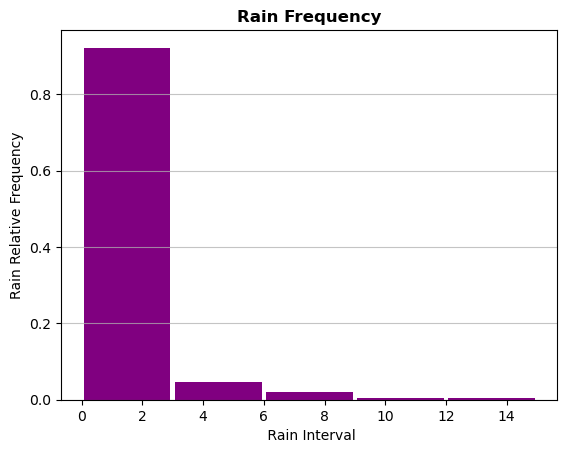

In [29]:
#Create the histogram with Series as Rain Data
Series.plot.hist(bins=Nbins, rwidth=0.95, color = 'purple', weights = np.ones_like(Series)/len(Series))

#Adding the appropiate labels and title to the histogram
plt.title('Rain Frequency', fontweight ='bold')
plt.xlabel(" Rain Interval")
plt.ylabel('Rain Relative Frequency')
plt.grid(axis = "y", alpha=0.75)
plt.show()

##### comments: The histogram above shows there are more frequency data between 0 and 3.

In [30]:
# Calculation for the 5 statistics calculations of Rain: 
Nmean=statistics.mean(fire['Rain'])
Nmedian=statistics.median(fire['Rain'])
Nmode=statistics.multimode(fire['Rain'])
Nstdev=statistics.stdev(fire['Rain'])
print('Rain Summary Measures:\n','Mean:',round(Nmean,4),
      '\n Median:',Nmedian,'\n Mode:',Nmode,'\n Standard Deviation:',round(Nstdev,2))

Rain Summary Measures:
 Mean: 0.763 
 Median: 0.0 
 Mode: [0.0] 
 Standard Deviation: 2.0


In [31]:
# Calling the three quartiles with the Rain_data
Nquantiles = np.quantile(fire.Rain,[0.25,0.5,0.75], method = 'midpoint')

#Calculating the Interquartile Range (IQR) of time using Rain_data
N_IQR = np.quantile(fire.Rain,0.75, method='midpoint')-np.quantile(fire.Rain,0.25,
                                                                          method = 'midpoint')

#Showing the results of above calculations
print('The three Quantiles of Rain are:', Nquantiles, "\nthe IQR is:",N_IQR,
      '\nMin Value Rain:',Nmin,', Max Value Rain:',Nmax)

The three Quantiles of Rain are: [0.  0.  0.5] 
the IQR is: 0.5 
Min Value Rain: 0.0 , Max Value Rain: 16.8


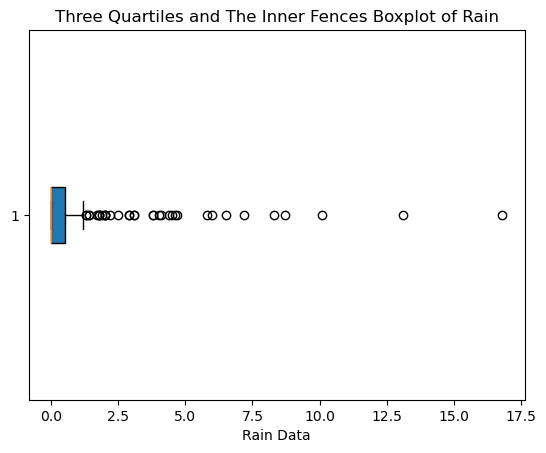

In [32]:
# Creating the plot using Rain data
plt.boxplot(fire.Rain, vert=False, patch_artist=True)
plt.title('Three Quartiles and The Inner Fences Boxplot of Rain')
plt.xlabel('Rain Data')

#Showing the Boxplot:
plt.show()

In [33]:
def find_outliers_IQR(fire):

   q1=fire.quantile(0.25)

   q3=fire.quantile(0.75)

   IQR=q3-q1

   outliers = fire[((fire<(q1-1.5*IQR)) | (fire>(q3+1.5*IQR)))]

   return outliers


outliers = find_outliers_IQR(fire["Rain"])

print("number of outliers:"+ str(len(outliers)))

print("max outlier value:"+ str(outliers.max()))

print("min outlier value:"+ str(outliers.min()))

number of outliers:35
max outlier value:16.8
min outlier value:1.3


##### Comments Outliers and Skewness: the above Boxplot shows there are many outliers in this Rain data after the upper fence, they aren't going to be removed as those data is important for the analysis. The median is tending to be in the left of the box and there is a very small lower fence. The data distribution is skewed to the right, which could be interpreted as the data is more concentrated between zero and 2.

#### FWI Variable (Fire Weather Index) (Response Variable).

In [34]:
# Frequency Table:
Fmin = fire['FWI'].min()
Fmax = fire['FWI'].max()

# Converting the DataFrame into Series or one dimensional
Series = fire.FWI.squeeze()

#Defining bins for FWI_data categories depending on max, min, adding 5 as length
Fbins = range(int(Fmin),int(Fmax),5)

# #adding a new column to the DataFrame representing FWI categories
Fcateg = pd.cut(Series, Fbins, include_lowest = True, right=False)

# #Create the frequency table for FWI
Ffrequency_table= pd.Series(Fcateg).value_counts().sort_index()

# #Calculation of relative frequency
Frelative_frequency = Ffrequency_table/ len(Fcateg)

# #combining frequency and relative frequency in a new DataFrame
Ffrq_distribution = pd.DataFrame({'Frequency': Ffrequency_table, "Relative Frequency": Frelative_frequency})
print("\nFrequency Table:")
print(Ffrq_distribution)


Frequency Table:
          Frequency  Relative Frequency
FWI                                    
[0, 5)          125            0.514403
[5, 10)          46            0.189300
[10, 15)         31            0.127572
[15, 20)         24            0.098765
[20, 25)          9            0.037037
[25, 30)          4            0.016461


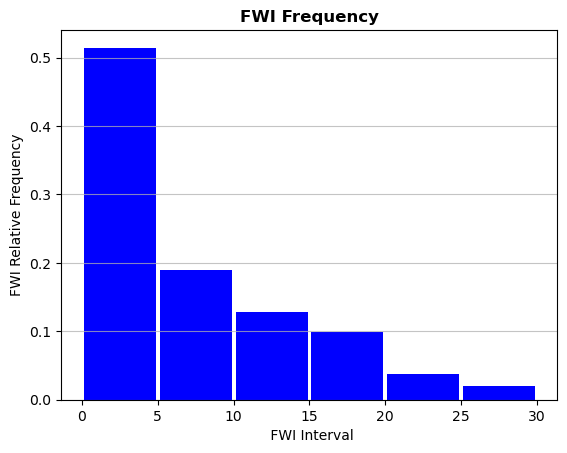

In [35]:
#Create the histogram with Series as FWI Data
Series.plot.hist(bins=Fbins, rwidth=0.95, color = 'Blue', weights = np.ones_like(Series)/len(Series))

#Adding the appropiate labels and title to the histogram
plt.title('FWI Frequency', fontweight ='bold')
plt.xlabel(" FWI Interval")
plt.ylabel('FWI Relative Frequency')
plt.grid(axis = "y", alpha=0.75)
plt.show()

##### comments: The histogram above shows there are more frequency data between 0 and 5.

In [36]:
# Calculation for the 5 statistics calculations of FWI: 
Fmean=statistics.mean(fire['FWI'])
Fmedian=statistics.median(fire['FWI'])
Fmode=statistics.multimode(fire['FWI'])
Fstdev=statistics.stdev(fire['FWI'])
print('FWI Summary Measures:\n','Mean:',round(Fmean,2),
      '\n Median:',Fmedian,'\n Mode:',Fmode,'\n Standard Deviation:',round(Fstdev,2))

FWI Summary Measures:
 Mean: 7.04 
 Median: 4.2 
 Mode: [0.4] 
 Standard Deviation: 7.44


In [37]:
# Calling the three quartiles with the FWI_data
Fquantiles = np.quantile(fire.FWI,[0.25,0.5,0.75], method = 'midpoint')

#Calculating the Interquartile Range (IQR) of time using FWI_data
F_IQR = np.quantile(fire.FWI,0.75, method='midpoint')-np.quantile(fire.FWI,0.25,
                                                                          method = 'midpoint')

#Showing the results of above calculations
print('The three Quantiles of FWI are:', Fquantiles, "\nthe IQR is:",F_IQR,
      '\nMin Value FWI:',Nmin,', Max Value FWI:',Nmax)

The three Quantiles of FWI are: [ 0.7   4.2  11.45] 
the IQR is: 10.75 
Min Value FWI: 0.0 , Max Value FWI: 16.8


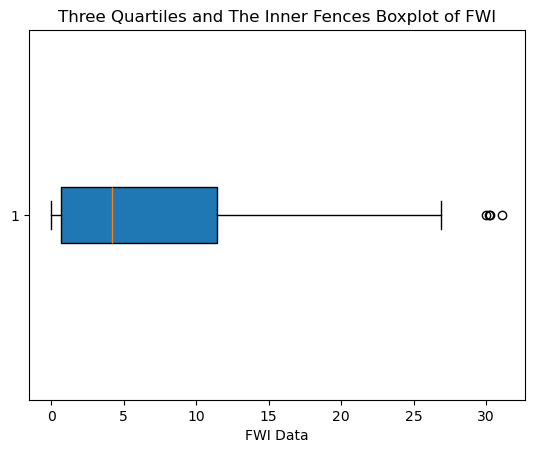

In [38]:
# Creating the plot using FWI data
plt.boxplot(fire.FWI, vert=False, patch_artist=True)
plt.title('Three Quartiles and The Inner Fences Boxplot of FWI')
plt.xlabel('FWI Data')

#Showing the Boxplot:
plt.show()

In [39]:
def find_outliers_IQR(fire):

   q1=fire.quantile(0.25)

   q3=fire.quantile(0.75)

   IQR=q3-q1

   outliers = fire[((fire<(q1-1.5*IQR)) | (fire>(q3+1.5*IQR)))]

   return outliers


outliers = find_outliers_IQR(fire["FWI"])

print("number of outliers:"+ str(len(outliers)))

print("max outlier value:"+ str(outliers.max()))

print("min outlier value:"+ str(outliers.min()))

number of outliers:4
max outlier value:31.1
min outlier value:30.0


##### Comments Outliers and Skewness: the above Boxplot shows there are few outliers in this Rain data after the upper fence, the median is tending to be in the left of the box and there is a small lower fence. The data distribution is skewed to the right, which could be interpreted as the data is more concentrated between zero and 5, but the other remaining data could be important for the analysis.
##### For all above outliers, these are part of the data to obtain the analysis in extrem weather to get the Weather Fire Index, and I don't have sufficient evidence for their behavior I'm not removing them from the data for the current analysis.

### Correlation Between Each Pair of Quantitive Variables.

In [40]:
#Calculation of correlation coefficient using Pearson's Coefficient
pearsons_coefficientT = np.corrcoef(fire.FWI, fire.Temperature)
print("The Pearson's Coefficient of FWI and Temperature are:\n", pearsons_coefficientT)

The Pearson's Coefficient of FWI and Temperature are:
 [[1.         0.56666988]
 [0.56666988 1.        ]]


##### Interpretation: the correlation coefficient is 0.57 aprox. This is a positive number somehow close to 1, which means that there are some good correlation between the values of the two variables.

In [41]:
pearsons_coefficientR = np.corrcoef(fire.FWI, fire.RH)
print("The Pearson's Coefficient of FWI and RH are:\n", pearsons_coefficientR)

The Pearson's Coefficient of FWI and RH are:
 [[ 1.         -0.58095675]
 [-0.58095675  1.        ]]


##### Interpretation: the correlation coefficient is -0.58. This is a negative number somehow close to -1, which means that there are some strong negative correlation between the values of the two variables.

In [42]:
pearsons_coefficientW = np.corrcoef(fire.FWI, fire.Ws)
print("The Pearson's Coefficient of FWI and WS are:\n", pearsons_coefficientW)

The Pearson's Coefficient of FWI and WS are:
 [[1.         0.03236777]
 [0.03236777 1.        ]]


##### Interpretation: the correlation coefficient is 0.03. This is a positive number very close to 0, which means that there is a weak positive linear correlation between the values of the two variables.

In [43]:
pearsons_coefficientN = np.corrcoef(fire.FWI, fire.Rain)
print("The Pearson's Coefficient of FWI and Rain are:\n", pearsons_coefficientN)

The Pearson's Coefficient of FWI and Rain are:
 [[ 1.         -0.32442156]
 [-0.32442156  1.        ]]


##### Interpretation: the correlation coefficient is -0.33 aprox. This is a negative number very close to 0, which means that there is a weak negative linear correlation between the values of the two variables.

### Scatter Matrix Correlation Between Each Pair of Quantitive Variables.

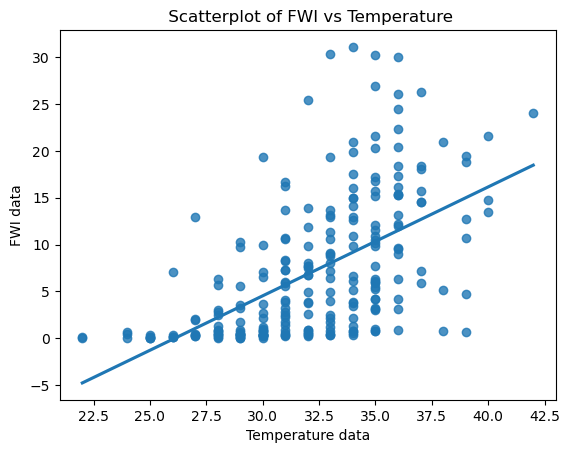

In [44]:
#Creating Scatterplot with regression line using the specific columns-names:
#FWI and Temperature
sct =sns.regplot(x=fire.Temperature, y=fire.FWI, ci=None)
# Adding the labels to the plot
sct.set(xlabel='Temperature data', ylabel='FWI data', title =' Scatterplot of FWI vs Temperature' )
plt.show()

##### Interpretation: the linear correlation is strong positive close to 1 between the two variables FWS vs Temperature. And the data looks spread in the center of the graph.

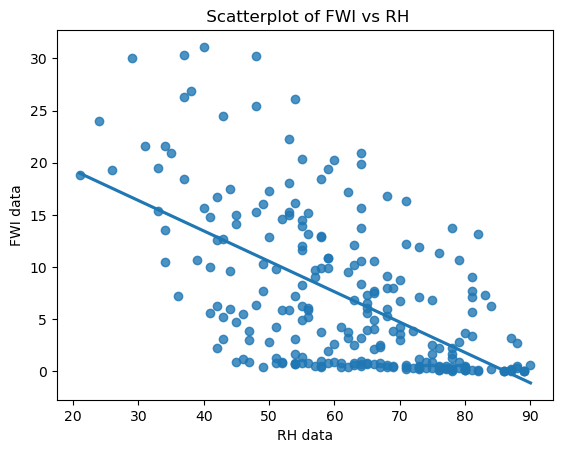

In [45]:
#Creating Scatterplot with regression line using the specific columns-names:
#FWI and RH
sct =sns.regplot(x=fire.RH, y=fire.FWI, ci=None)
# Adding the labels to the plot
sct.set(xlabel='RH data', ylabel='FWI data', title =' Scatterplot of FWI vs RH' )
plt.show()

##### Interpretation: the linear correlation is strong negative close to -1 between the two variables FWS vs RH., and there are data spread in the center of the graph.

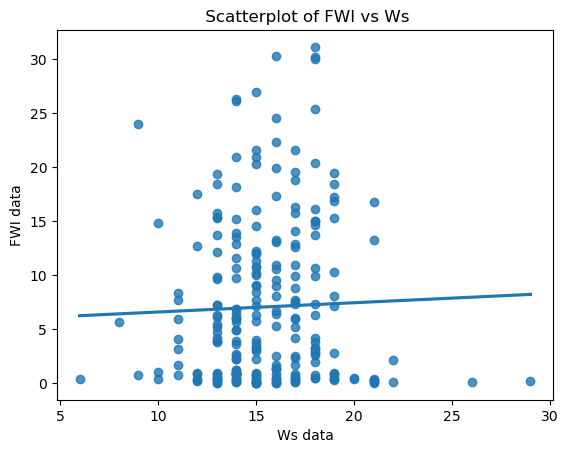

In [46]:
#Creating Scatterplot with regression line using the specific columns-names:
#FWI and Ws
sct =sns.regplot(x=fire.Ws, y=fire.FWI, ci=None)
# Adding the labels to the plot
sct.set(xlabel='Ws data', ylabel='FWI data', title =' Scatterplot of FWI vs Ws' )
plt.show()

##### Interpretation: there is a very small positive relation 0 between the two variables FWS vs Ws, and there are data spread in the center of the graph mostly.

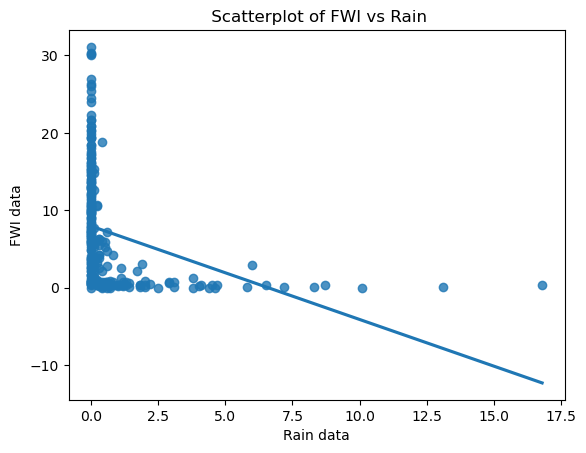

In [47]:
#Creating Scatterplot with regression line using the specific columns-names:
#FWI and Rain
sct =sns.regplot(x=fire.Rain, y=fire.FWI, ci=None)
# Adding the labels to the plot
sct.set(xlabel='Rain data', ylabel='FWI data', title =' Scatterplot of FWI vs Rain' )
plt.show()

##### Interpretation: the linear correlation is strong negative close to o between the two variables FWS vs Rain, and there are data spread in the left side of the graph.

In [48]:
# creating scatter_matrix to include all of above in once 
import plotly.express as px

smq = fire[['FWI', 'Temperature','RH','Ws','Rain']]
pd.DataFrame.iteritems = pd.DataFrame.items


figu = px.scatter_matrix(smq, width=900, height =600)
figu.show()

##### Interpretation: the graph above shows the same conclusion I did for each pair of variables, where there is a small linear regression line to correlate between variables and the data is highly concentrated in some zones.

### Multiple Linear Regression Analysis for Quantitive Variables.

In [49]:
import statsmodels.formula.api as sm

Reg_model = sm.ols('FWI ~ Temperature + RH + Ws + Rain', fire).fit()
print(Reg_model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.468    
Dependent Variable: FWI              AIC:                1516.6689
Date:               2023-12-26 15:06 BIC:                1534.1342
No. Observations:   243              Log-Likelihood:     -753.33  
Df Model:           4                F-statistic:        54.17    
Df Residuals:       238              Prob (F-statistic): 2.02e-32 
R-squared:          0.477            Scale:              29.465   
-------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept    -12.1282    6.1711  -1.9653  0.0505  -24.2851   0.0288
Temperature    0.6701    0.1322   5.0698  0.0000    0.4097   0.9305
RH            -0.1960    0.0311  -6.2985  0.0000   -0.2573  -0.1347
Ws             0.6629    0.1304   5.0846  0.0000    0.4061   0.9197
Rain  

#### Analysis of Coefficients Base on Estimates, Coefficient of Determination, and Hypothesis Testing for Quantitive Variables:

##### A = FWI, and B = Temperature/RH/WS/Rain
##### For a significance level of 0.05 or 95% confidence.

##### Coefficient of Determination for the model is 0.477, which means that the model is showing the proportion for the prediction of the FWI for a regression model analysis, the 47% of the total variation of the FWI occurs because of the variation of Temperature, RH, Ws, and Rain. And, there are space for error due randomless and weak explanation of the data to get the response FWI variable. 
##### Temperature and WS variables have positive estimate coefficientes: 0.6701 and 0.6629 respectively, which means that both have a positive relation, if these two variables increase, the FWI and others are increasing by these coefficients as well.
##### On the other hand, RH and Rain have negative number: -0.1960 and -0.6457, which means that if these variables increase the other FWI variable will decrease by these coefficients, so these two variables have a negative coefficient relation with FWI.
##### In terms of Hypotesis Testing:
##### For Temperature (Ho: B = 0, versus H1 ≠ 0), the t is 5.06 and the p-value is 0 < 0.05, it rejects the null hypotesis and is a positive relation. 
##### For RH (Ho: B = 0, versus H1 ≠ 0), the t  is -6.2985 and p-value is 0 < 0.05, it rejects the null hypotesis and is a negative relation.
##### For Ws (Ho: B = 0, versus H1 ≠ 0), the t  is 5.0846 and p-value is 0 < 0.05, it rejects the null hypotesis and is a positve relation.
##### For Rain (Ho: B = 0, versus H1 ≠ 0), the t is -3.4907 and p-value is 0.0006 < 0.05, it rejects the null hypotesis and is a negative relation.
##### In conclusion, the model denotes that a 47% of total variation of FWI occurs for the 4 variables, there are some relation but some of them is non-linear and have negative correlation, the hypotesis test for all of the explanatory variables B reject the null hypotesis H=0, so it means all of them have a correlation with FWI.

### Predictions with Quantitive Variables for FWI Response Variable.

In [50]:
Temperature = [30,32,31,36,37,29,28,34,22,24]
RH = [89,76,62,57,52,15,10,47,64,37]
Ws = [16,20,15,11,15,29,8,14,19,13]
Rain = [0.6, 0.7, 0, 0.4, 1.8, 1.4, 5.8, 8.3, 0.3, 2.2 ]

pred_q=pd.DataFrame({"Temperature": Temperature, 'RH': RH, 'Ws': Ws, 'Rain': Rain})
pred_q["Predicted Fire Weather Index(FWI)"] = Reg_model.predict(pred_q)
pred_q

Temperature  RH  Ws  Rain  Predicted Fire Weather Index(FWI)
0           30  89  16   0.6                           0.750234
1           32  76  20   0.7                           7.225272
2           31  62  15   0.0                           6.436653
3           36  57  11   0.4                           7.857267
4           37  52  15   1.8                          11.254819
5           29  15  29   1.4                          22.684373
6           28  10   8   5.8                           6.232440
7           34  47  14   8.3                           5.364303
8           22  64  19   0.3                           2.471607
9           24  37  13   2.2                           3.899362

##### Using the model, the above table shows a predicted numeric rating of fire intensity based on random data taken from Temperature(Max Temp in Celsius Degrees), RH(Relative Humidity), Ws(Wind Speed), and Rain(Total Day Rain in mm), with small index values as a result.

# 

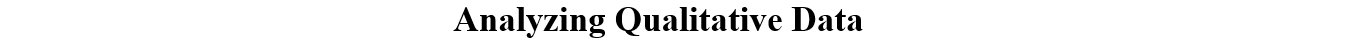

#### Using one qualitative response variable: Classes, and Four quantitative explanatory variables: Temperature, RH, WS, and Rain.

### Frequency Table, Plot Bar Chart and Pie Chart for the Qualitative Variable.

#### Classes Variable (Response Variable)

In [51]:
# Frequency table
freq_Ctable = fire["Classes"].value_counts()
freq_Ctable = pd.DataFrame({"Classes": freq_Ctable.keys(), 'frequency': freq_Ctable.values})
freq_Ctable = freq_Ctable.sort_values(by="Classes")
freq_Ctable['Relative_Frequency']=freq_Ctable['frequency']/freq_Ctable['frequency'].sum()
freq_Ctable

Classes  frequency  Relative_Frequency
0      fire        137            0.563786
1  not fire        106            0.436214

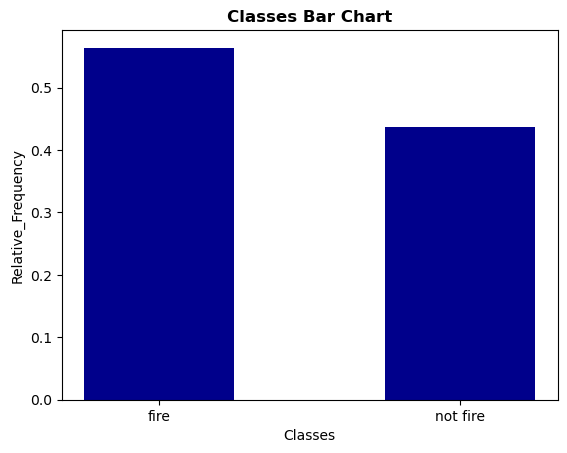

In [52]:
# Creating the bar chart for Classes variable
plt.bar(freq_Ctable.Classes,freq_Ctable.Relative_Frequency, color="darkblue", width = 0.5 )

#Adding the labels to the bar chart
plt.xlabel('Classes')
plt.ylabel('Relative_Frequency')
plt.title('Classes Bar Chart', fontweight = 'bold')
plt.show()

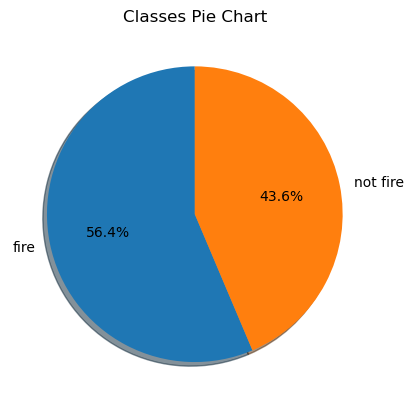

In [53]:
# Creating the pie chart for Classes variable:

plt.pie(freq_Ctable['Relative_Frequency'], labels = freq_Ctable['Classes'],
        autopct='%1.1f%%', startangle =90, shadow=True)
plt.title('Classes Pie Chart')
plt.show()

#### Comments: The above information shows that the Class Fire of the data is the 56.4% and the Not Fire Class is the 43.6%

### Division of DataSet to Train Data (70%) and Test Data (30%).

In [54]:
from sklearn.model_selection import train_test_split

y = fire[['Classes']]
x = fire[['Temperature', 'RH', 'Ws', 'Rain']]

#Splitting data into 70% train and 30% test data
(x_train, x_test, y_train, y_test) = train_test_split(x,y,test_size=0.3, random_state=0)

train_data=pd.concat([x_train, y_train], axis=1, join='inner')
test_data = pd.concat([x_test, y_test], axis=1, join='inner')


print("train Data \n", train_data,'\n')
print('Test Data \n', test_data)

train Data 
      Temperature  RH  Ws  Rain   Classes
61            36  45  14   0.0  not fire
116           26  81  21   5.8  not fire
52            27  66  22   0.4  not fire
66            32  75  14   0.0      fire
26            34  53  18   0.0      fire
..           ...  ..  ..   ...       ...
67            32  69  16   0.0      fire
193           40  31  15   0.0      fire
117           31  54  11   0.0  not fire
47            31  68  14   0.0      fire
173           32  48  18   0.0      fire

[170 rows x 5 columns] 

Test Data 
      Temperature  RH  Ws  Rain   Classes
110           29  57  14   0.0      fire
150           37  36  13   0.6      fire
37            33  68  19   0.0      fire
75            36  55  13   0.3      fire
109           32  49  11   0.0      fire
..           ...  ..  ..   ...       ...
89            35  48  18   0.0      fire
213           30  59  19   0.0      fire
74            33  66  14   0.0      fire
4             27  77  16   0.0  not fire
108   

##### Considering the length of data set is 243 rows in total, the above tables show 80% of the entire data set belongs to 170 rows for the Train Data, and that 30% of the entire data set corresponds to 73 rows for the Test Data.

#### Train Data Bar Plot

Classes 
fire        94
not fire    76
Name: count, dtype: int64


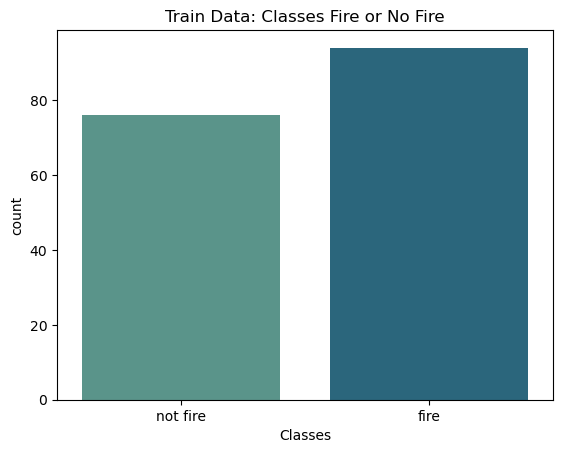

In [55]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

# Finding the number of Classes (Fire and No Fire) the Train data
print(y_train.value_counts())
sns.countplot(x='Classes', data=train_data, palette='crest')
plt.title('Train Data: Classes Fire or No Fire')
plt.show()

#### Test Data Bar Plot

Classes 
fire        43
not fire    30
Name: count, dtype: int64


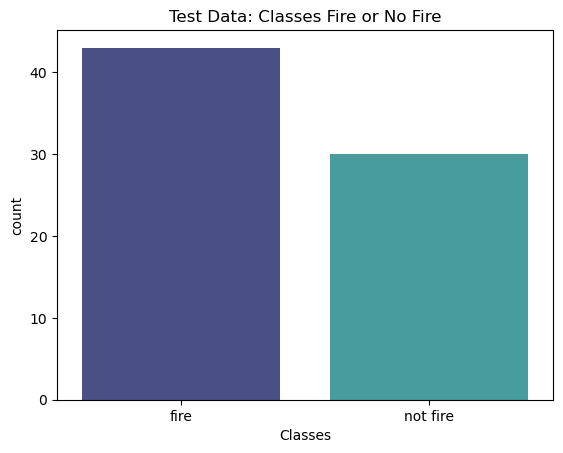

In [56]:
# Finding the number of Classes (Fire and No Fire) the Test data

print(y_test.value_counts())
sns.countplot(x='Classes', data=test_data, palette='mako')
plt.title('Test Data: Classes Fire or No Fire')
plt.show()

### Multiple Logistic Regression Analysis Based on Train Data for Classification.

### Analisis Based on Train Data of the Model for Classification.

In [57]:
from sklearn.linear_model import LogisticRegression

#Defining the multinomial logistic regression model

Clas_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)

#fitting the model on the whole dataset
Clas_model.fit(x_test, np.ravel(y_test))

#Predicting the class label
yhat = Clas_model.predict(x_train)
phat=Clas_model.predict_proba(x_train)
p=pd.DataFrame(phat, columns=['p1','p2']).reset_index(drop=True)

#Summarizing the predicted class
pred_c=pd.DataFrame({'True Classes': y_train.Classes, 
                   'Predicted Classes': yhat }).reset_index(drop=True)

#Getting the first 20 rows of train data and test data

results= pd.concat([pred_c,p], axis=1, join='inner')
print(results)
pred_c['Predicted Classes'].value_counts()

    True Classes Predicted Classes        p1        p2
0       not fire              fire  0.971936  0.028064
1       not fire          not fire  0.000948  0.999052
2       not fire          not fire  0.411050  0.588950
3           fire              fire  0.523823  0.476177
4           fire              fire  0.940580  0.059420
..           ...               ...       ...       ...
165         fire              fire  0.678531  0.321469
166         fire              fire  0.997391  0.002609
167     not fire              fire  0.724541  0.275459
168         fire              fire  0.569911  0.430089
169         fire              fire  0.922965  0.077035

[170 rows x 4 columns]


Predicted Classes
fire        112
not fire     58
Name: count, dtype: int64

##### Comparison between Predicted Values and True Values:
##### Model Base on Train Data: checking both predicted and real results, we can see that there are some differences between them, for example for the first 5 rows the prediction match with the true values in two out of the five. But for the last 5 rows, the predicted results match 4/5.
##### As a result of this model with 170 values, the 65.9% Correspond to Class Fire, and the 34.1% predicted the Class Not Fire.

### Confusion Matrix and Accuracy of Fitted Model for Classification.

#### Matrix and Accuracy Based on Train Data Model

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score

#Evaluate the model's performance

conf1_matrix = confusion_matrix(y_train, yhat)
print('Confusion Matrix: \n', conf1_matrix)

test1_acc = accuracy_score(y_train, yhat)
print('The Accuracy for Train Set is {} '.format((test1_acc*100).round(2)),"%")
print('Train Error Rate is {}'.format((100-test1_acc*100).round(2)),"%")

Confusion Matrix: 
 [[84 10]
 [28 48]]
The Accuracy for Train Set is 77.65  %
Train Error Rate is 22.35 %


##### comment results:  The accuracy of the test model base on Train Data is 77.65% with a test error rate of 22.35% which is a considerable test error for the model that could be not too bad to predict the Classes.
##### This matrix shows that 84 results where true and predicted matched to Fire, and 48 results where true and predicted matched No Fire.

### Analisis Based on Test Data of the Model for Classification.

In [59]:
#Defining the multinomial logistic regression model

Cl_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)

#fitting the model on the whole dataset
Cl_model.fit(x_train, np.ravel(y_train))

#Predicting the class label
yhat = Cl_model.predict(x_test)
phat=Cl_model.predict_proba(x_test)
p2=pd.DataFrame(phat, columns=['p1','p2']).reset_index(drop=True)

#Summarizing the predicted class
pred_cl=pd.DataFrame({'True Classes': y_test.Classes, 
                   'Predicted Classes': yhat }).reset_index(drop=True)


result2= pd.concat([pred_cl,p2], axis=1, join='inner')
print(result2)
pred_cl['Predicted Classes'].value_counts()

   True Classes Predicted Classes        p1        p2
0          fire              fire  0.589051  0.410949
1          fire              fire  0.653716  0.346284
2          fire              fire  0.839439  0.160561
3          fire              fire  0.725691  0.274309
4          fire              fire  0.770309  0.229691
..          ...               ...       ...       ...
68         fire              fire  0.948920  0.051080
69         fire              fire  0.758015  0.241985
70         fire              fire  0.761893  0.238107
71     not fire          not fire  0.311389  0.688611
72         fire              fire  0.758007  0.241993

[73 rows x 4 columns]


Predicted Classes
fire        45
not fire    28
Name: count, dtype: int64

##### Comparison between Predicted Values and True Values:
#####  Model Based on Test Data: the information resulted shows there are more accuracy, for example in the first 5 rows, all of them have the same prediction results in comparison with the true value, and the same for the last 5 rows of the data, where 5/5 are matching with same results of predicted vs real or true. 
##### As a result of this model with 73 values, the 61.6% Correspond to Class Fire, and the 38.4% predicted the Class Not Fire.

### Confusion Matrix and Accuracy of Fitted Model for Classification.

#### Matrix and Accuracy Based on Test Data Model

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

#Evaluate the model's performance


conf2_matrix = confusion_matrix(y_test, yhat)
print('Confusion Matrix: \n', conf2_matrix)

test2_acc = accuracy_score(y_test, yhat)
print('The Accuracy for Test Set is {} '.format((test2_acc*100).round(2)),"%")
print('Test Error Rate is {}'.format((100-test2_acc*100).round(2)),"%")

Confusion Matrix: 
 [[38  5]
 [ 7 23]]
The Accuracy for Test Set is 83.56  %
Test Error Rate is 16.44 %


##### comment results:  The accuracy of the test model base on Test Data is 83.56% with a test error rate of 16.44% which is a smallest error in comparison with the Fitted Train data model, this test error for the model could be good to predict the Classes. 
##### This matrix shows that 38 results where true and predicted matched to Fire, and 23 results where true and predicted matched No Fire.

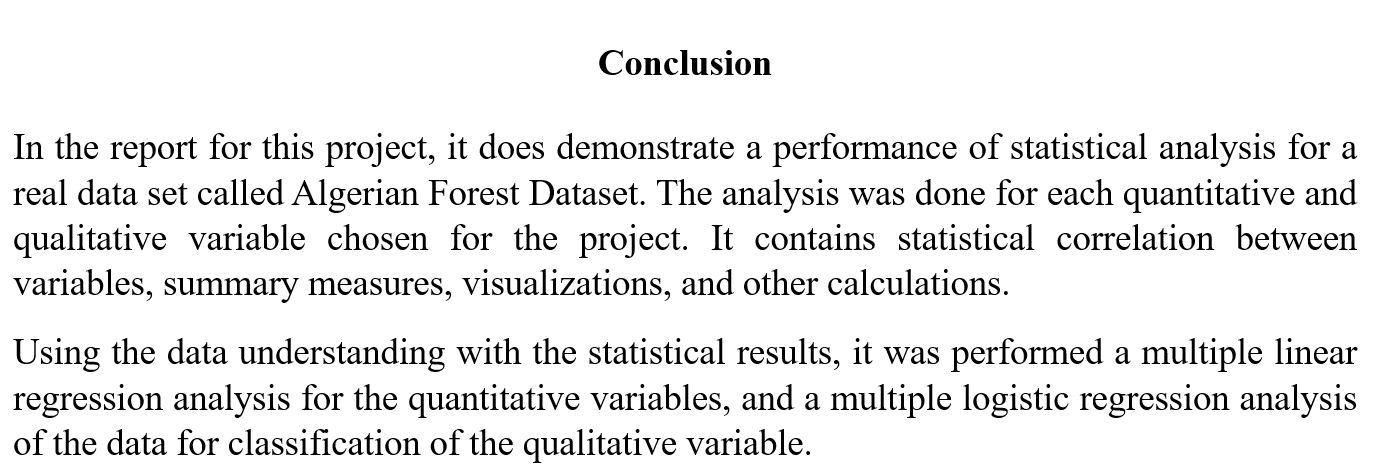

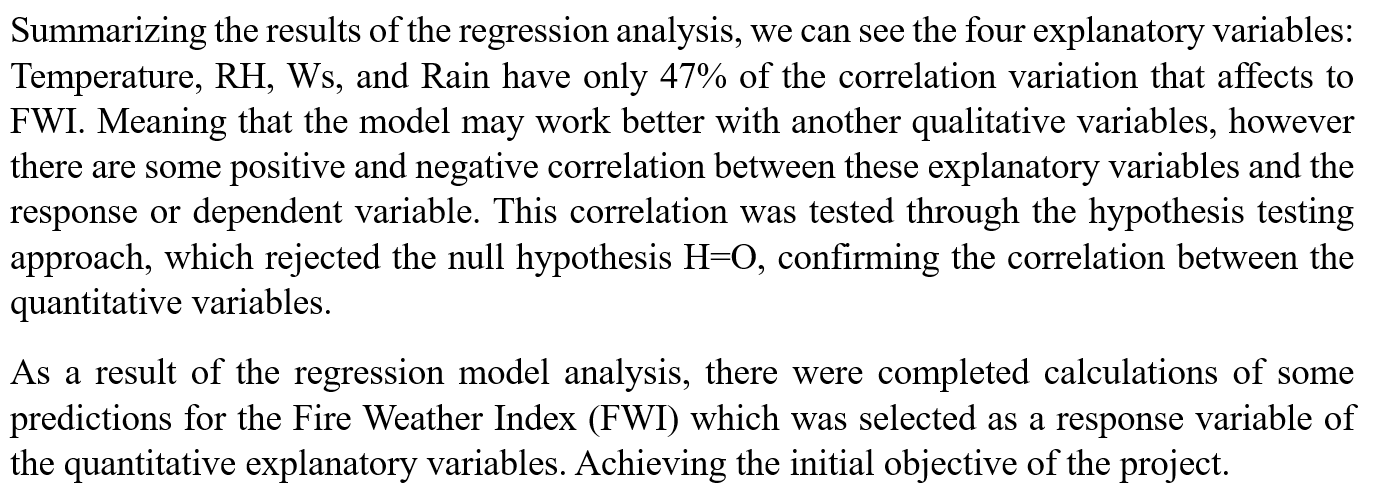

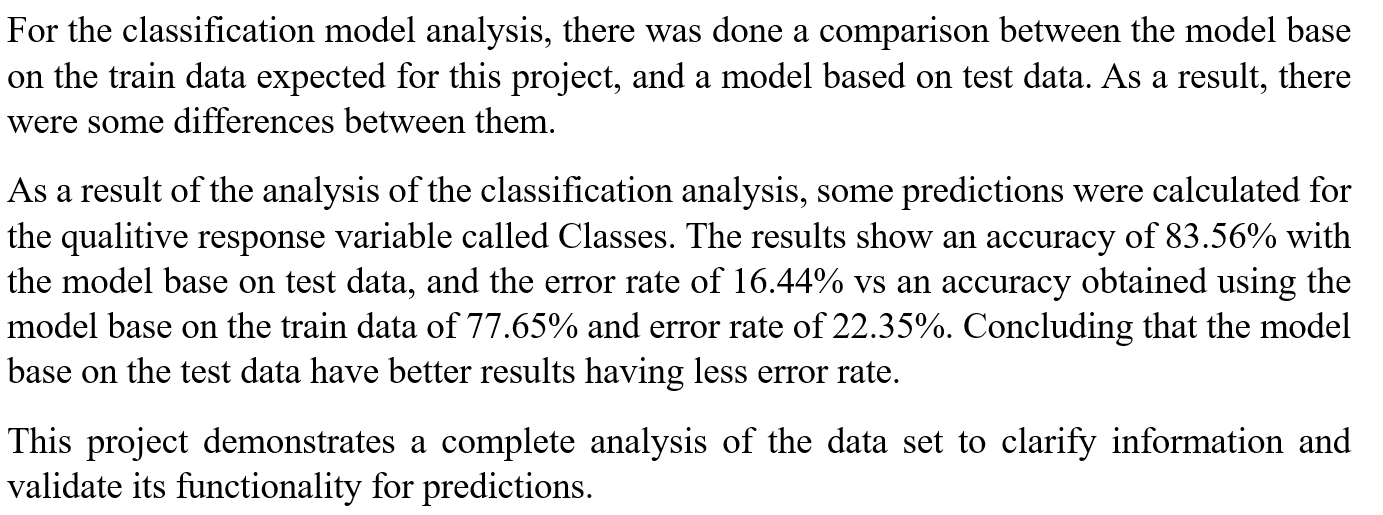

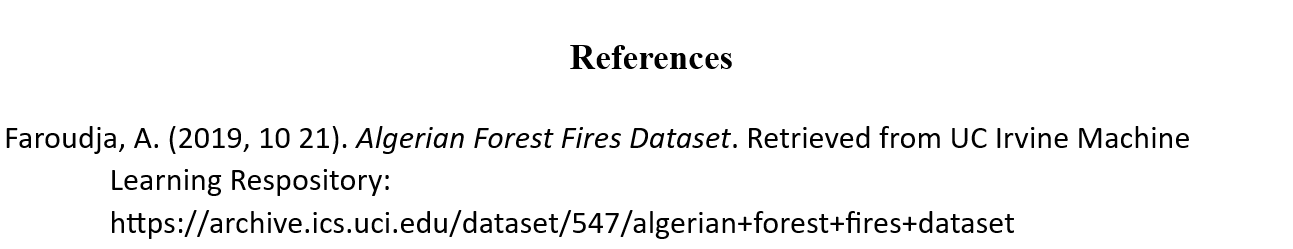